In [1]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams['figure.figsize'] = (10,5)
plt.rcParams['figure.dpi'] = 250
sns.set_style('darkgrid')
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
#read the data
df = pd.read_csv('https://raw.githubusercontent.com/aishwaryamate/Datasets/main/Cars.csv')
df

,HP,MPG,VOL,SP,WT
0,49,53.700681,89,104.185353,28.762059
1,55,50.013401,92,105.461264,30.466833
2,55,50.013401,92,105.461264,30.193597
3,70,45.696322,92,113.461264,30.632114
4,53,50.504232,92,104.461264,29.889149
...,...,...,...,...,...
76,322,36.900000,50,169.598513,16.132947
77,238,19.197888,115,150.576579,37.923113
78,263,34.000000,50,151.598513,15.769625
79,295,19.833733,119,167.944460,39.423099


In [3]:
df.describe()

,HP,MPG,VOL,SP,WT
count,81.000000,81.000000,81.000000,81.000000,81.000000
mean,117.469136,34.422076,98.765432,121.540272,32.412577
std,57.113502,9.131445,22.301497,14.181432,7.492813
min,49.000000,12.101263,50.000000,99.564907,15.712859
25%,84.000000,27.856252,89.000000,113.829145,29.591768
50%,100.000000,35.152727,101.000000,118.208698,32.734518
75%,140.000000,39.531633,113.000000,126.404312,37.392524
max,322.000000,53.700681,160.000000,169.598513,52.997752


In [ ]:
#Data visualization

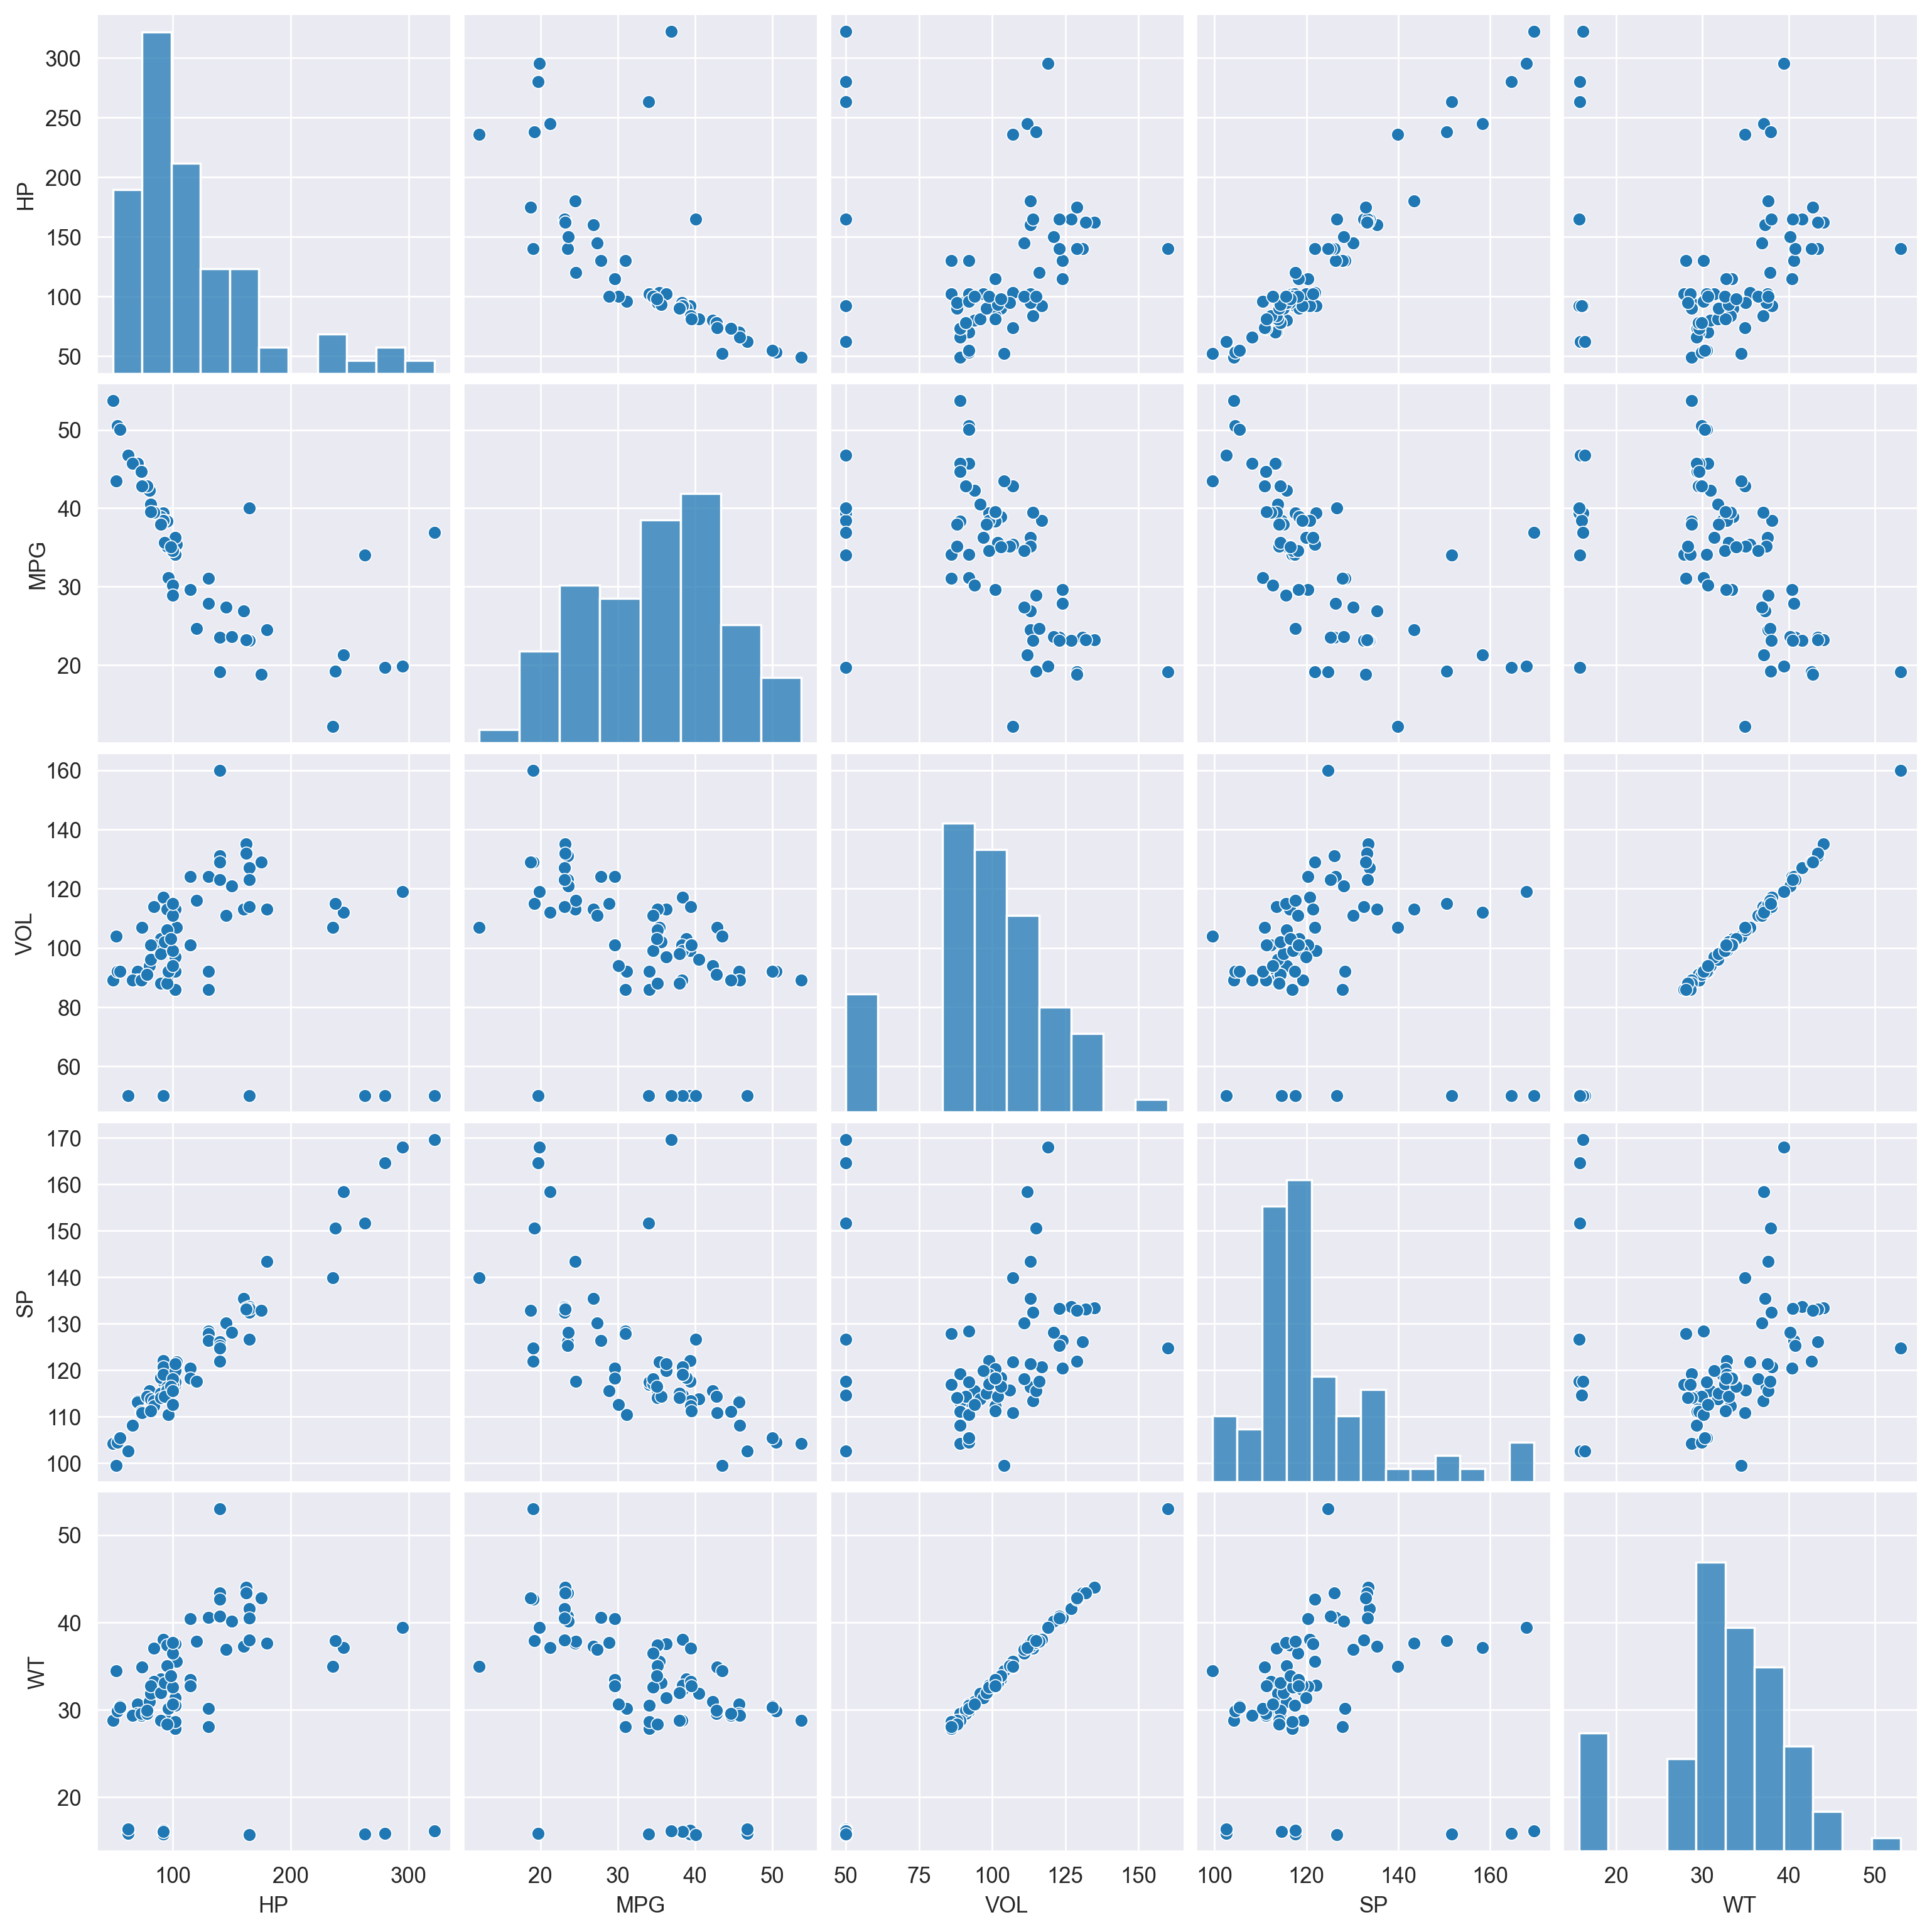

In [4]:
sns.pairplot(df)

In [ ]:
#Correlation

<Axes: >

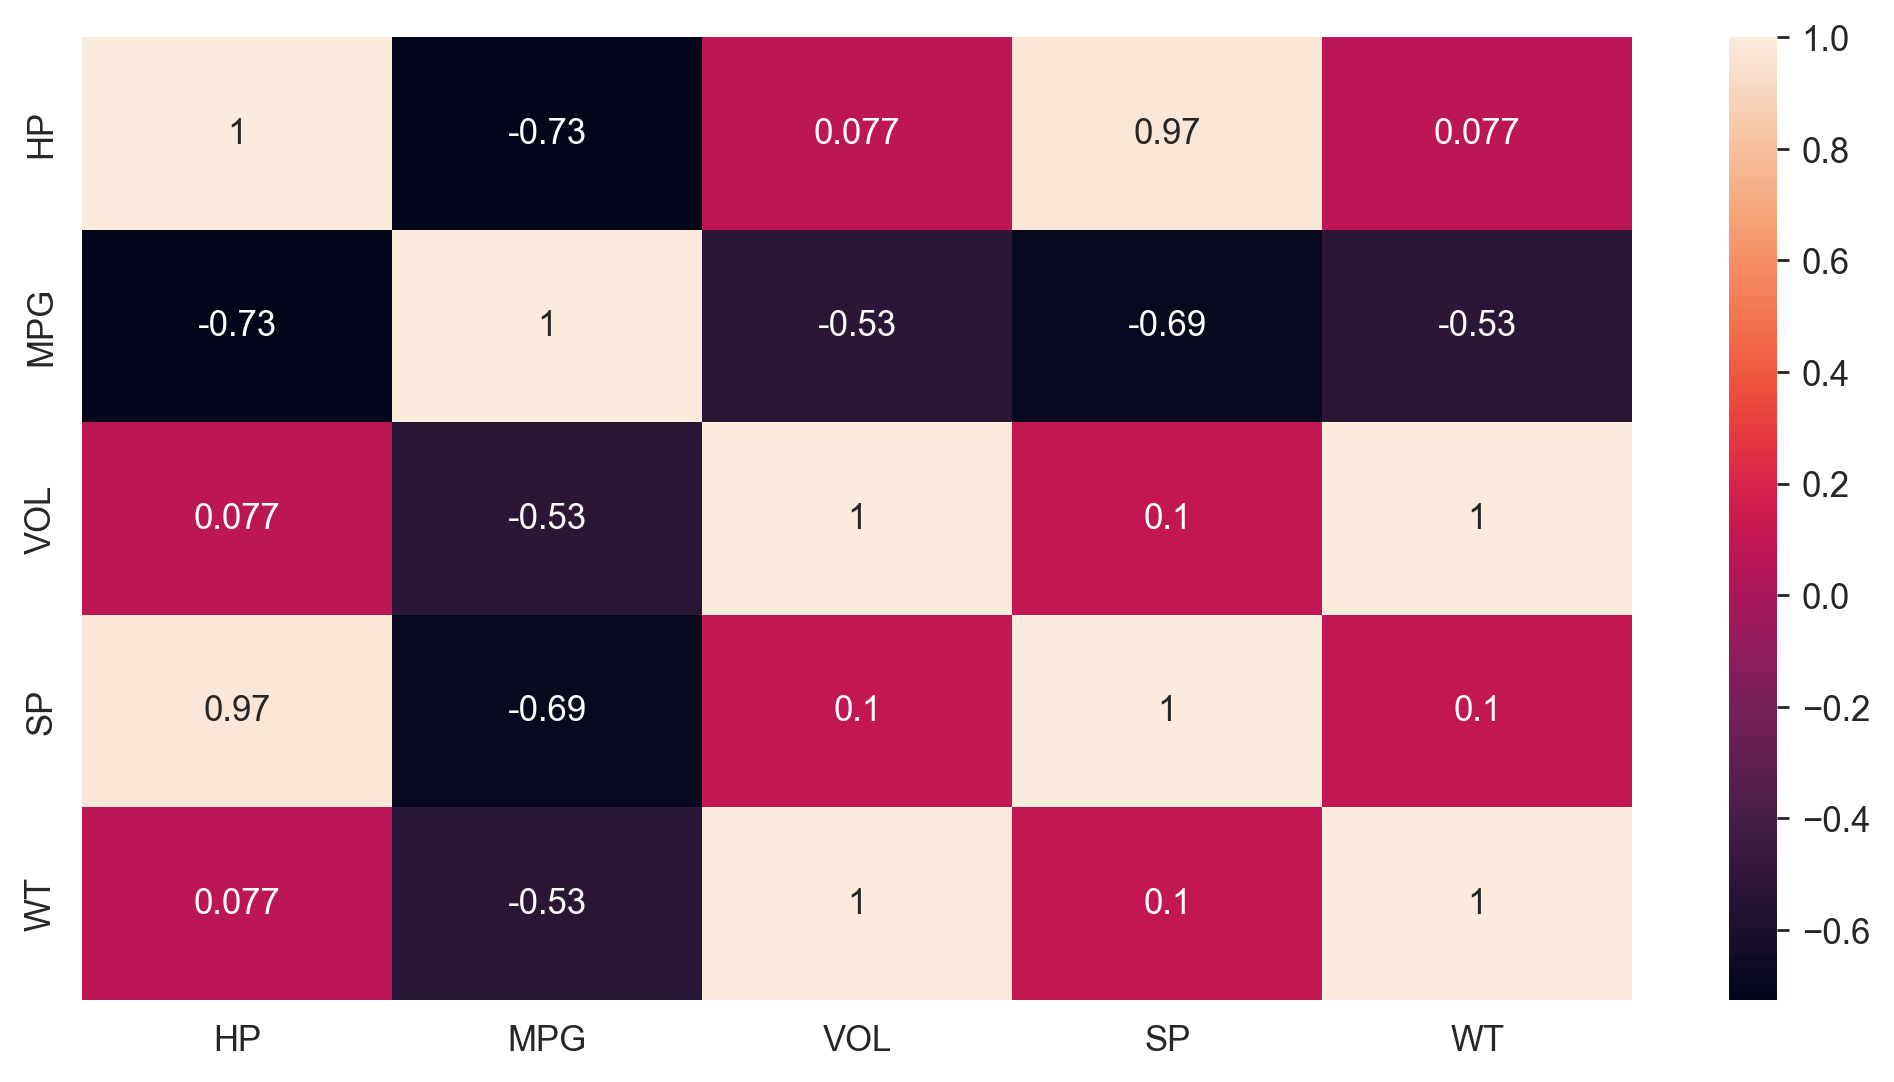

In [5]:
sns.heatmap(df.corr(),annot=True)

# Model Building

In [6]:
import statsmodels.formula.api as smf

In [7]:
model = smf.ols('MPG~HP+VOL+SP+WT',data=df).fit()

In [8]:
model.pvalues

Intercept    0.042936
HP           0.000001
VOL          0.556294
SP           0.014579
WT           0.813649
dtype: float64

# Linear Regression

In [9]:
#Wt
wt = smf.ols('MPG~WT+HP+SP',data = df).fit()
wt.pvalues

Intercept    5.053995e-02
WT           1.914892e-13
HP           7.560276e-07
SP           1.089096e-02
dtype: float64

In [10]:
#vol
vol = smf.ols('MPG~VOL+SP+HP',data = df).fit()
vol.pvalues

Intercept    4.194554e-02
VOL          1.648229e-13
SP           1.207855e-02
HP           8.644870e-07
dtype: float64

# Calculate VIF

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [ ]:
df.head()

In [ ]:
data = df.drop(columns=['MPG'])
data

# List comprehension

In [ ]:
data

In [ ]:
data.values

In [ ]:
vif = pd.DataFrame()
vif

In [ ]:
vif['Features'] = data.columns
vif

In [ ]:
vif['VIF'] = [variance_inflation_factor(data.values,i) for i in range(len(data.columns))]

In [ ]:
vif

# Subset Selection

AIC

In [ ]:
#wt
wt = smf.ols('MPG~WT+HP+SP',data = df).fit()
wt.rsquared, wt.aic

In [ ]:
#vol
vol = smf.ols('MPG~VOL+SP+HP',data = df).fit()
vol.rsquared, vol.aic

# MODEL VALIDATION TECHNIQUES

# 1.Residual Analysis


**As per the subset selection, it is clear that VOL column is more important than WT column as it's R2 value is more and AIC value is less,So we will select VOL columns and will drop WT column.**

**NORMALITY TEST**

In [ ]:
model = smf.ols('MPG~HP+VOL+SP', data=df).fit()
model.rsquared

In [ ]:
#Statsmodel
import statsmodels.api as sm

In [ ]:
df.head()

In [ ]:
model.resid

In [ ]:
#Q-Q plot
sm.qqplot(model.resid, line = 'q');

In [ ]:
#get index for higher residuals

In [ ]:
np.argmax(model.resid), np.max(model.resid)

# 2. Residual plot of Homoscedasticity

- Homoscedasticity can be checked by plotting a scatter plot between fitted values and residuals.

In [ ]:
df

In [ ]:
model.params

In [ ]:
model.fittedvalues

In [ ]:
model.resid

In [ ]:
plt.scatter(model.fittedvalues, model.resid)
plt.xlabel('Predicted Values')
plt.ylabel('Errors')

# 3.Residual VS Regressor

In [ ]:
#Vol
sm.graphics.plot_regress_exog(model,'VOL');

In [ ]:
sm.graphics.plot_fit(model,'VOL');

In [ ]:
#Sp
sm.graphics.plot_fit(model,'SP');

In [ ]:
#Hp
sm.graphics.plot_fit(model,'HP');

# MODEL DELETION TECHNIQUES

# Cook's Distance
   - **Detecting influencers and outliers**

In [ ]:
model

In [ ]:
#Find the influence data
inf = model.get_influence()

#Calculate the cooks distance
c,p = inf.cooks_distance

In [ ]:
c

In [ ]:
# Cook's distance plot
plt.stem(c)
plt.xlabel('Index')
plt.ylabel('Cooks Distance')

In [ ]:
np.argmax(c), np.max(c)

In [ ]:
df.iloc[[76]]

In [ ]:
df.head()

In [ ]:
#Influence Plot
from statsmodels.graphics.regressionplots import influence_plot

In [ ]:
influence_plot(model);

In [ ]:
#Calculate cutoff
k = len(df.columns)
n = len(df)

lv = 3*(k+1)/n
lv

In [ ]:
influence_plot(model)
plt.axvline(lv, linestyle = '--', color = 'red')

# Improving the model

In [ ]:
df.drop(index=76,inplace=True)

In [ ]:
df

In [ ]:
#reset the index

In [ ]:
df.reset_index(inplace=True)

In [ ]:
df

In [ ]:
df.drop(columns=['index'], inplace=True)

In [ ]:
df

In [ ]:
final_model = smf.ols('MPG~HP+SP+VOL', data = df).fit()

In [ ]:
final_model.rsquared

**Since the value is <1 , we can stop the diagnostic process and finalize the model**

# Predicting for new records

In [ ]:
df.head()

In [ ]:
test = pd.DataFrame({
    'HP' : [56,53.62,95],
    'VOL' : [92.6,85.63,75],
    'SP' : [110,112,150],
})

In [ ]:
final_model.params

In [ ]:
test

In [ ]:
final_model.predict(test)